# Transaction fee analysis
This content is part of the following scientific paper: https://people.mpi-sws.org/~johnme/pdf/messias_imc2021_btc_tx_ordering.pdf
```
Selfish & Opaque Transaction Ordering in the Bitcoin Blockchain: The Case for Chain Neutrality. 
Johnnatan Messias, Mohamed Alzayat, Balakrishnan Chandrasekaran, Krishna P. Gummadi, Patrick Loiseau, and Alan Mislove. 2021.
In ACM Internet Measurement Conference (IMC '21), November 2-4, 2021, Virtual Event, USA. ACM, New York, NY, USA, 16 pages.
https://doi.org/10.1145/3487552.3487823
```

## Code
### We define some code below

In [1]:
from utils_plot import *
import pandas as pd
import json
import gzip

### During our analysis, on November 24th, 2020, 1 BTC worths to 18,875.10 USD

In [2]:
btc_to_usd_in_2020_11_24 = 18875.10

## Loading txs acceleration price data set

In [3]:
cols = ['txid', 'size', 'children_total_size', 'price_usd', 
        'discount_usd', 'price_cny', 'discount_cny']
tx_acceleration_df = pd.read_csv('data/tx_acceleration_prices_2020-11-24 10:08:41.932872.tsv.gz', sep=';', usecols=cols)
tx_acceleration_df.rename(columns={'size': 'ssize'}, inplace=True)
tx_acceleration_df['final_price_usd'] = tx_acceleration_df['price_usd'] - tx_acceleration_df['discount_usd']
tx_acceleration_df.shape

(23341, 8)

#### Showing the first 10 registers

In [4]:
tx_acceleration_df.head(10)

,txid,ssize,children_total_size,price_usd,discount_usd,price_cny,discount_cny,final_price_usd
0,052a65b28e88ce031804f88cf5eff66e07ceb37dc7419b3eff98fcb35b3fa274,482,450,173.31,26.13,1139.53,171.85,147.18
1,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,214,0,39.79,0.93,261.62,6.16,38.86
2,630b1fc5e6055ee245ea2de8066d83510fc17a700eddd0b7c8ac10fc0c566504,224,0,41.65,1.12,273.85,7.38,40.53
3,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,1513,0,281.35,58.54,1849.90,384.97,222.81
4,c60bdb95afa8674f6474c1b703e06448c02fc67d6f7e5b58dc2896bf61fd28a8,225,0,41.84,1.14,275.10,7.50,40.70
5,ac6e6adbfb32c80335d8b30fa9202c944914ee404f8f5095f0ee5895fdb8899f,299,0,55.60,2.51,365.57,16.55,53.09
6,c6d9c557b9d76c9843aab7f8834ec923fac0f732ca2b86f33220c423b0b505ea,223,0,41.46,1.10,272.60,7.25,40.36
7,ded610f2caecd4511ab44c3b0973b479fd1ec325a5c89f4884bfcbf5c93d1cff,226,0,42.02,1.16,276.28,7.62,40.86
8,5719fb99fe825cbc62b3da9310ce7bdd7b8fcb1c113e89836c97dea25df2208c,250,0,46.48,1.60,305.61,10.56,44.88
9,8f65234003c2b5cb350a4a39bfc1b47280d18944a8e95d0505bd77239e5c3761,226,1857,387.34,98.66,2546.79,648.71,288.68


## Loading mempool data set

In [5]:
cols = ['txid', 'size', 'fee', 'time', 'height', 'descendantcount', 'descendantsize', 
        'descendantfees', 'ancestorcount', 'ancestorsize', 'ancestorfees']
mempool_df = pd.read_csv('data/mempool_df_2020-11-24 10:08:41.932872.tsv.gz', sep=';', usecols=cols)
mempool_df.rename(columns={'size': 'vsize'}, inplace=True)
mempool_df['fee_usd'] = (mempool_df['fee'] * btc_to_usd_in_2020_11_24).round(2)
mempool_df.shape

(26332, 12)

#### Showing the first 10 registers

In [6]:
mempool_df.head(10)

,txid,vsize,fee,time,height,descendantcount,descendantsize,descendantfees,ancestorcount,ancestorsize,ancestorfees,fee_usd
0,379299a2da48278667039202266ad90a35c901bd8e9bbc86f7a284c8da56fe04,224,0.00004540,2020-11-24 08:42:06,658433,2,414,12882,2,450,5860,0.86
1,a5983f469cdbbc3e1357ea2122daf20a3bbc64eee3cabad5ddccefd33c432b7a,340,0.00000000,2020-11-10 11:51:32,656288,1,340,0,1,340,0,0.00
2,b3e83576397e19657c8eab6dd5dc0238006e5e046d4fd27d7df1e04be7fa7fc6,271,0.00004096,2020-11-24 08:11:05,658432,1,271,4096,1,271,4096,0.77
3,a7c3de64c7e6337343051e96e608e7d62ffd47571bb499a8460bfcb7b3a28a8d,340,0.00000000,2020-11-10 11:51:32,656288,1,340,0,1,340,0,0.00
4,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,1513,0.00019884,2020-11-24 09:20:07,658436,1,1513,19884,1,1513,19884,3.75
5,c907996fb1dfea5ea856b25d1741dba9443cb73bdeadcbde99014c5f8d1dbce3,166,0.00001479,2020-11-23 16:25:16,658346,2,813,9548,1,166,1479,0.28
6,acc2ab37a855cfd7ab6ade705368d1d68ab04fbb9280e6d0d83fe77a770e68dd,223,0.00000000,2020-11-10 11:51:32,656288,1,223,0,1,223,0,0.00
7,c6d9c557b9d76c9843aab7f8834ec923fac0f732ca2b86f33220c423b0b505ea,223,0.00003791,2020-11-24 08:07:11,658432,1,223,3791,1,223,3791,0.72
8,abfda91d47a965124fd2a82f2896e7e4a89f19130c090c8d9fb94adafdcc55be,373,0.00000000,2020-11-10 11:51:32,656288,1,373,0,1,373,0,0.00
9,ab06ec65916fbf638a69a3ad81d67d5ffa5e8a707c7849fd526fc85cca62ac6d,304,0.00000000,2020-11-10 11:51:32,656288,1,304,0,1,304,0,0.00


# Analysis

## Merging both data sets

In [7]:
df = mempool_df.merge(tx_acceleration_df, right_on='txid', left_on='txid', how='right')
df['children_vsize'] = df['ancestorsize'] - df['vsize']
df.shape

(23341, 20)

#### Showing the first 10 registers

In [8]:
df.head(10)

,txid,vsize,fee,time,height,descendantcount,descendantsize,descendantfees,ancestorcount,ancestorsize,ancestorfees,fee_usd,ssize,children_total_size,price_usd,discount_usd,price_cny,discount_cny,final_price_usd,children_vsize
0,052a65b28e88ce031804f88cf5eff66e07ceb37dc7419b3eff98fcb35b3fa274,482,0.00020131,2020-11-24 09:39:00,658436,1,482,20131,3,932,24651,3.80,482,450,173.31,26.13,1139.53,171.85,147.18,450
1,bfdd6ac8b5caa111c646d6d398c9109a65e6c92ff19f73734ea7f396284f5e6f,133,0.00000938,2020-11-23 19:48:22,658365,1,133,938,1,133,938,0.18,214,0,39.79,0.93,261.62,6.16,38.86,0
2,630b1fc5e6055ee245ea2de8066d83510fc17a700eddd0b7c8ac10fc0c566504,224,0.00003088,2020-11-24 08:16:15,658433,2,563,8560,1,224,3088,0.58,224,0,41.65,1.12,273.85,7.38,40.53,0
3,d91f953df0022b43a630263fe58d5db3e1a4dfcd510bd3e6bf4cfb69cf4ccece,1513,0.00019884,2020-11-24 09:20:07,658436,1,1513,19884,1,1513,19884,3.75,1513,0,281.35,58.54,1849.90,384.97,222.81,0
4,c60bdb95afa8674f6474c1b703e06448c02fc67d6f7e5b58dc2896bf61fd28a8,225,0.00002497,2020-11-24 07:52:16,658431,1,225,2497,1,225,2497,0.47,225,0,41.84,1.14,275.10,7.50,40.70,0
5,ac6e6adbfb32c80335d8b30fa9202c944914ee404f8f5095f0ee5895fdb8899f,188,0.00000514,2020-11-23 22:35:44,658382,1,188,514,1,188,514,0.10,299,0,55.60,2.51,365.57,16.55,53.09,0
6,c6d9c557b9d76c9843aab7f8834ec923fac0f732ca2b86f33220c423b0b505ea,223,0.00003791,2020-11-24 08:07:11,658432,1,223,3791,1,223,3791,0.72,223,0,41.46,1.10,272.60,7.25,40.36,0
7,ded610f2caecd4511ab44c3b0973b479fd1ec325a5c89f4884bfcbf5c93d1cff,226,0.00004972,2020-11-24 08:42:54,658433,1,226,4972,1,226,4972,0.94,226,0,42.02,1.16,276.28,7.62,40.86,0
8,5719fb99fe825cbc62b3da9310ce7bdd7b8fcb1c113e89836c97dea25df2208c,168,0.00002977,2020-11-24 08:08:04,658432,1,168,2977,1,168,2977,0.56,250,0,46.48,1.60,305.61,10.56,44.88,0
9,8f65234003c2b5cb350a4a39bfc1b47280d18944a8e95d0505bd77239e5c3761,226,0.00012939,2020-11-24 09:36:11,658436,1,226,12939,4,2083,69885,2.44,226,1857,387.34,98.66,2546.79,648.71,288.68,1857


# Transaction fee vs acceleration price

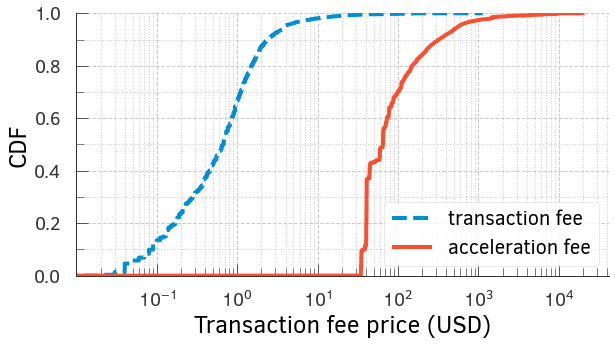

In [9]:
ax = plot_cdf(data=mempool_df.query('txid in @tx_acceleration_df.txid').fee_usd, x_label='Transaction fee price (in usd)', y_label='CDF', log=True, interval=None,
             color=None, ax=None, label='transaction fee',
             linewidth=None, linestyle='--', alpha=1, y_lim=[0, 1], marker=None, markersize=None)
ax = plot_cdf(data=tx_acceleration_df.final_price_usd, x_label='Transaction fee price (USD)', y_label='CDF', log=True, interval=None,
             color=None, ax=ax, label='acceleration fee',
             linewidth=None, linestyle='-', alpha=1, y_lim=[0, 1], marker=None, markersize=None)
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.1))
plt.grid(which='minor', axis='both', linestyle=':')
plt.legend()
plt.savefig('../images/tx-fees-comparison.png', bbox_inches='tight')

In [10]:
df[
    ['fee_usd', 'final_price_usd', 'vsize', 'ssize', 'children_total_size', 'ancestorsize']
  ].describe(percentiles=[.01, .05, .1, .2, .25, .5, .75, .8, .9, .95, .99]).round(2)

,fee_usd,final_price_usd,vsize,ssize,children_total_size,ancestorsize
count,23341.00,23341.00,23341.00,23341.00,23341.00,23341.00
mean,1.77,199.73,812.81,1094.92,615.92,1265.70
std,11.63,744.65,3808.89,6191.09,4784.16,4774.59
min,0.02,34.34,110.00,187.00,0.00,110.00
1%,0.03,34.67,111.00,189.00,0.00,111.00
5%,0.05,35.01,142.00,191.00,0.00,142.00
10%,0.09,37.01,165.00,192.00,0.00,168.00
20%,0.17,40.53,190.00,223.00,0.00,192.00
25%,0.21,40.70,192.00,224.00,0.00,216.00
50%,0.67,64.97,225.00,246.00,0.00,260.00


## Feature correlation

<AxesSubplot:>

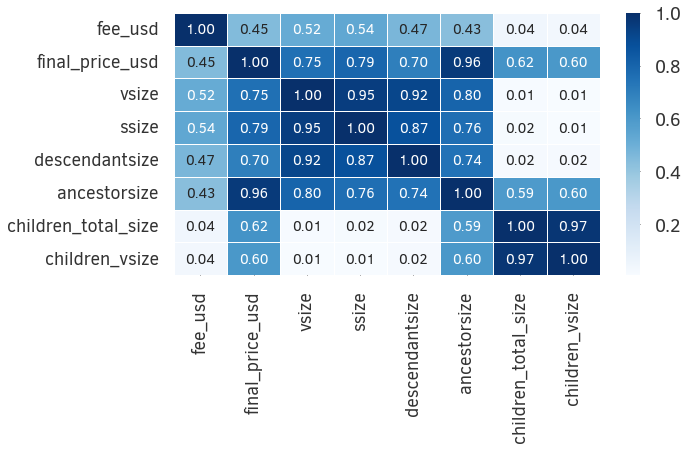

In [11]:
sns.heatmap(
    df[['fee_usd', 'final_price_usd', 'vsize', 'ssize', 'descendantsize', 
        'ancestorsize', 'children_total_size', 'children_vsize']].corr(), 
    annot=True, cmap='Blues', cbar=True, linewidths=.5, annot_kws={"size": 14},
    fmt='.2f'
)

In [12]:
df.sort_values(
    by=['ancestorsize', 'final_price_usd', 'ssize', 'vsize', 'final_price_usd']
)[
    ['txid', 'final_price_usd', 'fee_usd', 'ancestorsize', 'ssize', 'vsize',
     'descendantsize', 'fee', 'time', 'height']].head(10)

,txid,final_price_usd,fee_usd,ancestorsize,ssize,vsize,descendantsize,fee,time,height
43,c95c7d6de83b8c918fe9dc146a9d7f311338d42e593097de1bbcd12e0eef91d5,35.01,0.02,110,191,110,110,0.00000110,2020-11-23 11:15:58,658312
173,d22044704f09f478bf3fbff8ab47493e06feb385a8a610111b426e29808f3344,35.01,0.07,110,191,110,492,0.00000387,2020-11-23 11:00:21,658312
339,e267a47a38897b2a7a8ca054ce38c437f02b0c12038e5b0e19e2c0d37cbb6796,35.01,0.07,110,191,110,110,0.00000363,2020-11-23 13:29:13,658326
383,d4b48ba264f42178dc82c1f6134b78688740d2021b26da735fe758d80041001f,35.01,0.02,110,191,110,110,0.00000110,2020-11-23 11:21:17,658312
1148,f30bfc8c789775b42c56575eba1277ab7d4ed501c27f564eec39b8ae1c077f30,35.01,0.25,110,191,110,110,0.00001320,2020-11-24 02:27:37,658400
1518,dfe1a5dbd74938fb7a1746dc1677a79d93cbf0d4ec180b68aed7f66201b473cf,35.01,0.21,110,191,110,110,0.00001100,2020-11-23 14:14:38,658332
1522,a2a6799a763a514b7ef92a6d4676ae7cd08072d759f754a8d7c185c353fdce5a,35.01,0.27,110,191,110,110,0.00001430,2020-11-23 10:57:49,658312
1623,34fbfc93045b9d96f1c025b79c70f6a11782f6d0d6f28c859d9e2d8f8fe770ec,35.01,0.08,110,191,110,110,0.00000440,2020-11-23 10:58:38,658312
1958,fdb39f9cbc9a7cb86444900e43575717fbc5b96d0a7ce97ad2fe6555080381f3,35.01,0.02,110,191,110,110,0.00000110,2020-11-23 11:18:36,658312
2058,f3f63aa781b62c222aaad0cc65204f4ef3e8f8a63815480458774cd1b7bd45dc,35.01,0.12,110,191,110,110,0.00000660,2020-11-23 11:01:55,658312


# Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Preparing data set

In [14]:
features = ['fee', 'vsize', 'ssize', 'children_vsize', 'ancestorsize', 'children_total_size']
target = 'final_price_usd'

In [15]:
data = df[features+[target]]
data.shape

(23341, 7)

In [16]:
train_df, test_df = train_test_split(data, test_size=0.2, shuffle=True)
print(f"train={train_df.shape[0]}, test={test_df.shape[0]}")

train=18672, test=4669


## Model

In [17]:
reg = LinearRegression(n_jobs=-1)

In [18]:
reg.fit(X=train_df[features], y=train_df[target])

LinearRegression(n_jobs=-1)

## Evaluation

In [19]:
# Coefficients
print(f"Coefficients\n{dict(zip(features, reg.coef_))}")

# Intercept
print(f"\nIntercept={reg.intercept_}")

Coefficients
{'fee': 1316.9432699048164, 'vsize': -0.0007769472474101738, 'ssize': 0.0918660613016463, 'children_vsize': 0.005498424826587201, 'ancestorsize': 0.004727830376807597, 'children_total_size': 0.08846187552045778}

Intercept=36.685854227628994


In [20]:
pred = reg.predict(test_df[features])
mean_error = mean_squared_error(test_df[target], pred)
coef_determination = r2_score(test_df[target], pred)

In [21]:
print('Mean squared error: %.2f'% mean_error)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% coef_determination)

Mean squared error: 572.41
Coefficient of determination: 1.00


## Predict price vs actual price (in USD)

(0.0, 20000.0)

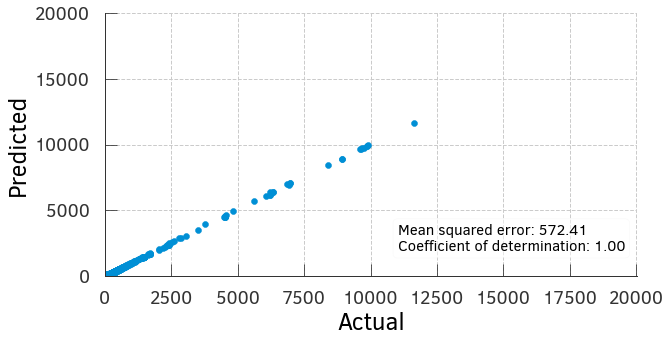

In [22]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(test_df[target], pred)

# plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.55, 0.2, 'Mean squared error: %.2f\nCoefficient of determination: %.2f'% 
        (mean_error, coef_determination), transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

ax.set_xlim((0, 20030))
ax.set_ylim((0, 20000))